In [13]:
import pandas as pd

In [14]:
data = pd.read_csv('/Users/macbookpro/Desktop/Sales.csv', encoding='unicode_escape')

In [15]:
df = pd.DataFrame(data)

In [16]:
print(df)

          Date  Customer ID Product Category  Sales Amount
0   2024-01-01          101      Electronics         500.0
1   2024-01-02          102         Clothing         300.0
2   2024-01-03          103      Electronics         600.0
3   2024-01-04          104        Furniture         800.0
4   2024-01-05          105      Electronics         450.0
5   2024-01-00          106         Clothing         200.0
6   2024-01-07          107      Electronics           NaN
7   2024-01-08          108        Furniture         700.0
8   2024-01-08          108        Furniture         700.0
9   2024-01-09          109         Clothing        -100.0
10  2024-01-10          110      Electronics         550.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              11 non-null     object 
 1   Customer ID       11 non-null     int64  
 2   Product Category  11 non-null     object 
 3   Sales Amount      10 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 480.0+ bytes


In [18]:
# removing nan values
df.dropna(inplace = True)

In [19]:
# Change negative sales amounts to positive
df['Sales Amount'] = abs(df['Sales Amount'])

In [20]:
df

,Date,Customer ID,Product Category,Sales Amount
0,2024-01-01,101,Electronics,500.0
1,2024-01-02,102,Clothing,300.0
2,2024-01-03,103,Electronics,600.0
3,2024-01-04,104,Furniture,800.0
4,2024-01-05,105,Electronics,450.0
5,2024-01-00,106,Clothing,200.0
7,2024-01-08,108,Furniture,700.0
8,2024-01-08,108,Furniture,700.0
9,2024-01-09,109,Clothing,100.0
10,2024-01-10,110,Electronics,550.0


In [78]:
# removing duplicates
df.drop_duplicates()

,Date,Customer ID,Product Category,Sales Amount,Gender
0,2024-01-01,101,Electronics,500.0,M
1,2024-01-02,102,Clothing,300.0,M
2,2024-01-03,103,Electronics,600.0,F
3,2024-01-04,104,Furniture,800.0,F
4,2024-01-05,105,Electronics,450.0,M
7,2024-01-08,108,Furniture,700.0,M
8,2024-01-08,108,Furniture,700.0,F
9,2024-01-09,109,Clothing,100.0,F
10,2024-01-10,110,Electronics,550.0,F


In [80]:
# reset the index
df.reset_index(drop=True)

,Date,Customer ID,Product Category,Sales Amount,Gender
0,2024-01-01,101,Electronics,500.0,M
1,2024-01-02,102,Clothing,300.0,M
2,2024-01-03,103,Electronics,600.0,F
3,2024-01-04,104,Furniture,800.0,F
4,2024-01-05,105,Electronics,450.0,M
5,2024-01-08,108,Furniture,700.0,M
6,2024-01-08,108,Furniture,700.0,F
7,2024-01-09,109,Clothing,100.0,F
8,2024-01-10,110,Electronics,550.0,F


In [81]:
import matplotlib.pyplot as plt

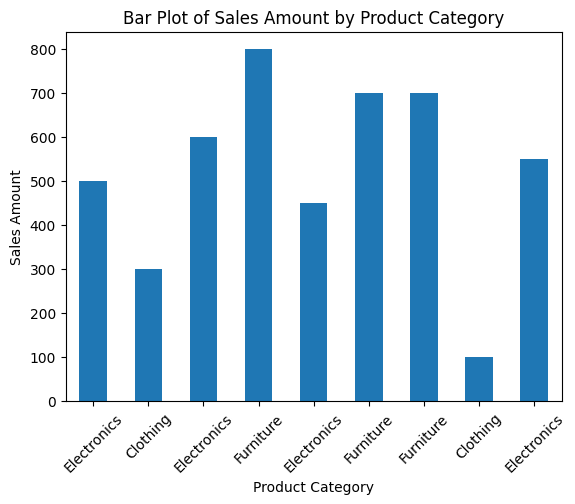

In [82]:
df.plot(x='Product Category', y='Sales Amount', kind='bar', legend=False)
plt.xlabel('Product Category')
plt.ylabel('Sales Amount')
plt.title('Bar Plot of Sales Amount by Product Category')
plt.xticks(rotation=45)
plt.show()

In [83]:
# Add a new column 'Gender' with random values
import random
gender_values = ['M', 'F']
df['Gender'] = [random.choice(gender_values) for _ in range(len(df))]
df

,Date,Customer ID,Product Category,Sales Amount,Gender
0,2024-01-01,101,Electronics,500.0,F
1,2024-01-02,102,Clothing,300.0,M
2,2024-01-03,103,Electronics,600.0,M
3,2024-01-04,104,Furniture,800.0,F
4,2024-01-05,105,Electronics,450.0,F
7,2024-01-08,108,Furniture,700.0,M
8,2024-01-08,108,Furniture,700.0,M
9,2024-01-09,109,Clothing,100.0,M
10,2024-01-10,110,Electronics,550.0,F


<Axes: xlabel='Product Category'>

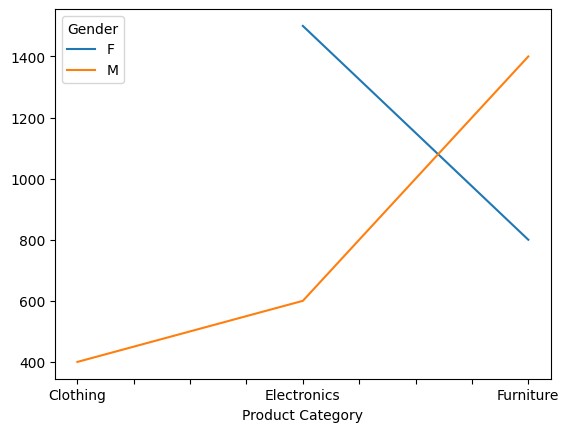

In [84]:
# Group by 'Product Category' and 'Gender', then sum the 'Sales Amount' for each group
grouped = df.groupby(['Product Category', 'Gender'])['Sales Amount'].sum().unstack()
grouped.plot()

<Figure size 1000x600 with 0 Axes>

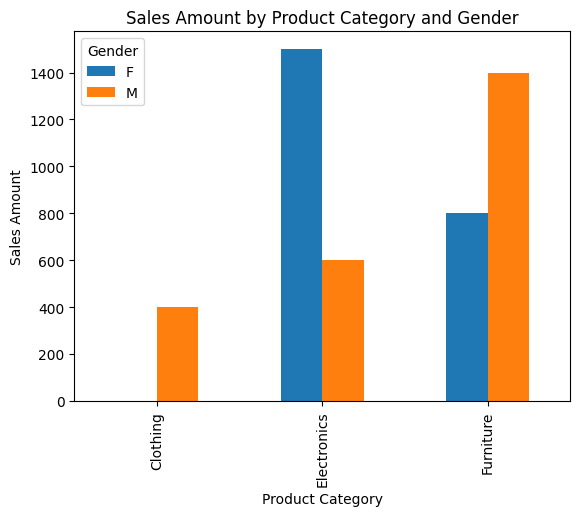

In [120]:
# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Sales Amount')
plt.title('Sales Amount by Product Category and Gender')
plt.legend(title='Gender')
plt.show()

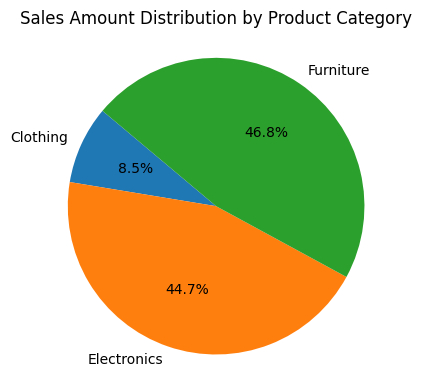

In [129]:
# Group by 'Product Category' and sum the 'Sales Amount' for each category
category_sales = df.groupby('Product Category')['Sales Amount'].sum()

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Amount Distribution by Product Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()